In [1]:
# import libraries
import re
import sys
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
%matplotlib inline

In [4]:
sns.set(style='darkgrid')
sns.set_palette('PuBuGn_d')

In [5]:
# Look at first 5 rows
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# Checking the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

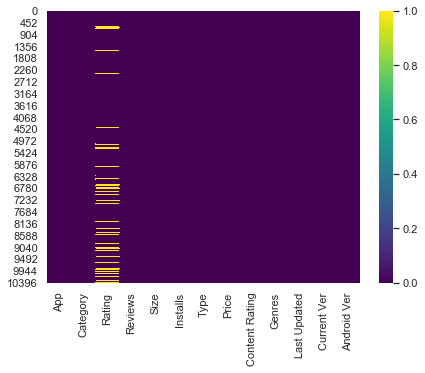

In [7]:
# Exploring missing data, checking to see if any has NaN values
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull(), cmap='viridis')
df.isnull().any()

In [8]:
# Looks like there are missing values in "Rating", "Type", 
# "Content Rating" and " Android Ver" also has some missing values, but most of these missing values in Rating column.

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
#There are two strategies to handle missing data, either removing records with these missing values or replacing 
#missing values with a specific value like (mean, median or mode) value of the column

# The best way to fill missing values might be using the median instead of mean.
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# Before filling null values we have to clean all non numerical values & unicode charachters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())

In [11]:
# Count number of unique values in category column 
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [12]:
# Check record  of unreasonable value which is 1.9
i = df[df['Category'] == '1.9'].index
df.loc[i]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0,NaN


In [14]:
# Drop bad column
df = df.drop(i)

In [15]:
# Removing NaN values
df = df[pd.notnull(df['Last Updated'])]
df = df[pd.notnull(df['Content Rating'])]

In [17]:
# App values encoding
le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])
# This encoder converts the values into numeric values

In [18]:
# Category features encoding
category_list = df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis=1)

In [19]:
# Genres features encoding
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])

In [20]:
# Encode Content Rating features
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])

In [21]:
# Price cleaning
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))

In [22]:
# Installs cleaning
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [23]:
# Type encoding
df['Type'] = pd.get_dummies(df['Type'])

In [25]:
# Last Updated encoding
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))

In [26]:
# Convert kbytes to mbytes 
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter

In [28]:
# Size cleaning
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)

In [30]:
# Split data into training and testing sets
features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend(category_list)
X = df[features]
y = df['Rating']

In [31]:
# Split the dataset into 75% train data and 25% test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [34]:
# Look at the 15 closest neighbors
model = KNeighborsRegressor(n_neighbors=15)

In [35]:
# Find the mean accuracy of knn regression using X_test and y_test
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=15, p=2,
          weights='uniform')

In [36]:
# Calculate the mean accuracy of the KNN model
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 92.22%'

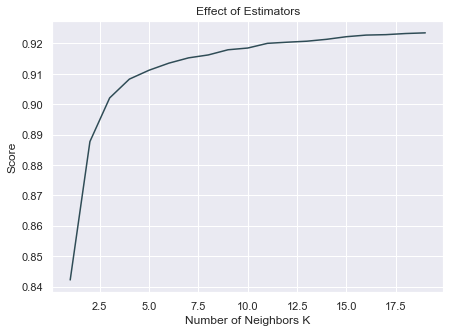

In [37]:
# Try different numbers of n_estimators - this will take a minute or so
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

In [38]:
# The RandomForestRegressor

[(10, 0.9337831701273873),
 (20, 0.9337182335455425),
 (30, 0.9366231736144283),
 (40, 0.9360680021374842),
 (50, 0.9380084892460543),
 (60, 0.9361198193519266),
 (70, 0.9372473081119662),
 (80, 0.9381273992129818),
 (90, 0.9376203083467519),
 (100, 0.9384910201978297),
 (110, 0.9376613256750638),
 (120, 0.9379502219779632),
 (130, 0.9380991157585128),
 (140, 0.9373074335958894),
 (150, 0.9377964982291853),
 (160, 0.9382962995226616),
 (170, 0.9387642039362992),
 (180, 0.9380181966370955),
 (190, 0.9391290099592304)]

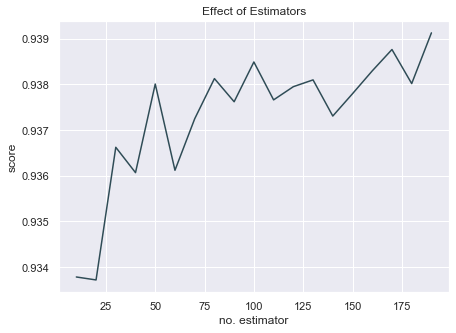

In [39]:
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [40]:
predictions = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.24079937852010116)

In [41]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

('Mean Squared Error:', 0.15882903047091415)

In [42]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.3985336001780956)

In [43]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from scipy import stats
plt.style.use("ggplot")
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})
import warnings
warnings.filterwarnings('ignore')

In [44]:
dataf = pd.read_csv('googleplaystore.csv') # read the data

In [45]:
dataf["Size"] = df["Size"].apply(lambda x: str(x).replace('Varies with device', 'NaN') 
                              if "Varies with device" in str(x) else x)
dataf["Size"] = df["Size"].apply(lambda x: str(x).replace('M','') 
                              if 'M' in str(x) else x)
dataf["Size"] = df["Size"].apply(lambda x: str(x).replace(',','') 
                              if ',' in str(x) else x)
dataf['Size'] = df['Size'].apply(lambda x: str(x).replace('+', '') 
                              if '+' in str(x) else x)
dataf['Size'] = df["Size"].apply(lambda x: float(str(x).replace('k',''))/1024 
                              if 'k' in str(x) else x)

In [46]:
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace('+', '') if '+' in x else x)
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace(',', '') if ',' in x else x)
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace('Free', 'NaN') if 'Free' in x else x)
dataf['Installs'] = dataf['Installs'].apply(lambda x: x.replace('Paid', 'NaN') if 'Paid' in x else x)

In [47]:
dataf["Price"] = dataf["Price"].apply(lambda x: str(x).replace('$','') if '$' in x else x)

In [48]:
dataf = dataf.dropna()

In [49]:
dataf['Size'] = dataf['Size'].apply(lambda x:float(x))
dataf['Installs'] = dataf['Installs'].apply(lambda x:int(x))
dataf['Reviews'] = dataf['Reviews'].apply(lambda x:int(x))
dataf['Price'] = dataf['Price'].apply(lambda x:float(x))
dataf = dataf.dropna()

In [50]:
data = dataf[['Rating', 'Size', 'Installs', 'Reviews', 'Price']]

In [51]:
def mean_norm(x):
    x = np.array(x)
    x = (x - np.mean(x))/np.std(x)
    return x

In [52]:
data['Rating'] = mean_norm(data['Rating'])
data['Size'] = mean_norm(data['Size'])
data['Installs'] = mean_norm(data['Installs'])
data['Reviews'] = mean_norm(data['Reviews'])
data['Price'] = mean_norm(data['Price'])
result = data

In [53]:
data = np.array(data)
print(data[0:5])

[[-0.17824396  0.00205049 -0.19612598 -0.16351077 -0.06076046]
 [-0.56641601 -0.21517518 -0.19075679 -0.16325384 -0.06076046]
 [ 0.9862722  -0.44543439 -0.14144793 -0.13573493 -0.06076046]
 [ 0.59810014  0.2627213   0.35164066 -0.09499092 -0.06076046]
 [ 0.20992809 -0.70176068 -0.1951398  -0.16325384 -0.06076046]]


In [54]:
def input_fn():
    return tf.data.Dataset.from_tensors(tf.convert_to_tensor(data, dtype=tf.float32)).repeat(1)

In [57]:
x = input_fn()
print(x)

<RepeatDataset shapes: (9360, 5), types: tf.float32>


In [ ]:
#K-Means

In [58]:
num_clusters = 3
kmeans = tf.contrib.factorization.KMeansClustering(
    num_clusters=num_clusters, use_mini_batch=False)

AttributeError: module 'tensorflow' has no attribute 'contrib'